# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [ ]:
! git clone https://github.com/aub5uy/assignment4.git

Cloning into 'assignment4'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17 (delta 2), reused 6 (delta 1), pack-reused 9
Receiving objects: 100% (17/17), 656.26 KiB | 14.58 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
# Q1-1:
import pandas as pd
df = pd.read_csv('./assignment4/data/cars_hw.csv')
print(df.shape)
print(df.columns)
print(df.describe(),'\n\n')
# Find missing entries
missing_entries = df.isnull().sum()

# Display the count of missing entries for each column
print('Missing values:')
print(missing_entries)
print("No missing values\n")
df.head()

(976, 12)
Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06 


Missing values:
Unnamed: 0           0
Make                 0
Make_Year            

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [ ]:
from scipy import stats
import numpy as np
# Extract numeric columns for outlier detection
numeric_columns = ['Make_Year', 'Mileage_Run', 'Price', 'Seating_Capacity']

# Used ChatGPT for z score strategy
# Calculate Z-scores for numeric columns
z_scores = stats.zscore(df[numeric_columns])

# Define a threshold for Z-scores (e.g., 3 or -3)
z_score_threshold = 3

# Identify and flag outliers for each numeric column
outliers = abs(z_scores) > z_score_threshold

# Count the number of outliers in each numeric column
outlier_counts = outliers.sum(axis=0)

# Print the numeric columns with outlier counts
print("Numeric columns with outlier counts:")
print(outlier_counts)

# Apply log transformation to 'Price'
df['Price'] = np.log1p(df['Price'])

# Apply log transformation to 'Seating_Capacity'
df['Seating_Capacity'] = np.log1p(df['Seating_Capacity'])

# Check the updated dataset
print(df.head())

Numeric columns with outlier counts:
Make_Year            0
Mileage_Run          0
Price               25
Seating_Capacity    44
dtype: int64
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st          1.791759    diesel      7-Speed         Automatic   
1          1st          1.791759    petrol      5-Speed            Manual   
2          2nd          1.791759    petrol      5-Speed            Manual   
3          1st          1.791759    petrol      5-Speed            Manual   
4          1st          1.791759    petr

count    976.000000
mean      13.411035
std        0.450275
min       12.144203
25%       13.072649
50%       13.409797
75%       13.691082
max       14.894261
Name: Price, dtype: float64


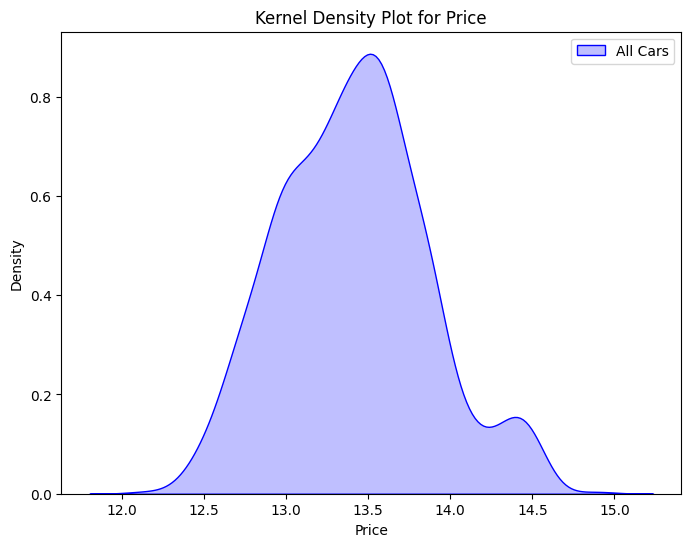

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919898  0.480974  12.495008  12.568395  12.752289   
Datsun           3.0  12.576050  0.036311  12.538971  12.558305  12.577640   
Ford            52.0  13.468282  0.210894  12.577640  13.361382  13.469494   
Honda           73.0  13.536319  0.336971  12.663501  13.272508  13.573440   
Hyundai        305.0  13.368512  0.398781  12.421188  13.091906  13.366095   
Jeep             4.0  14.216591  0.105084  14.070154  14.183271  14.240266   
Kia              8.0  14.292178  0.076877  14.129592  14.272242  14.303106   
MG Motors       35.0  14.439052  0.066263  14.278616  14.395745  14.429615   
Mahindra        18.0  13.898954  0.159906  13.587356  13.851809  13.905681   
Maruti Suzuki  293.0  13.218134  0.371408  12.375820  12.926351  13.174958   
Nissan           4.0  13.641195  0.392609  13.071072  13.537776 

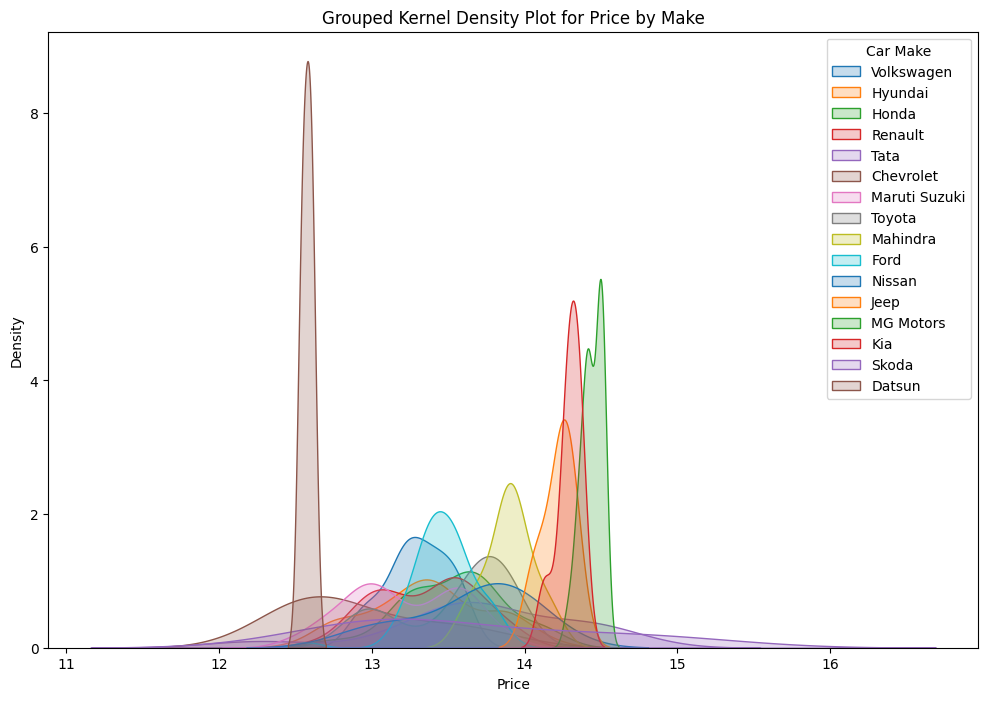

In [ ]:
# Q1-2:
import seaborn as sns
import matplotlib.pyplot as plt

# Summarize the 'Price' variable
price_summary = df['Price'].describe()
print(price_summary)

# Create a kernel density plot for 'Price'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Price'], fill=True, color='b', label='All Cars')
plt.xlabel('Price')
plt.title('Kernel Density Plot for Price')
plt.legend(title=None)  # No legend title for this plot
plt.show()

# Summarize prices by brand (Make)
price_by_make = df.groupby('Make')['Price'].describe()
print(price_by_make)

# Used ChatGPT
# Create a grouped kernel density plot for 'Price' by Make
plt.figure(figsize=(12, 8))
for make in df['Make'].unique():
    sns.kdeplot(data=df[df['Make'] == make], x='Price', fill=True, label=make)

plt.xlabel('Price')
plt.title('Grouped Kernel Density Plot for Price by Make')
plt.legend(title='Car Make', loc='upper right')
plt.show()

In [ ]:
# Q1-3,4
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

# Extract numeric and categorical columns
numeric_columns = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']
categorical_columns = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Separate the target variable 'Price'
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Numeric Variables Only
model1 = LinearRegression()
model1.fit(X_train[numeric_columns], y_train)
predictions_model1 = model1.predict(X_test[numeric_columns])
r2_model1 = r2_score(y_test, predictions_model1)
rmse_model1 = np.sqrt(mean_squared_error(y_test, predictions_model1))

print("Model 1: Numeric Variables Only")
print("R^2:", r2_model1)
print("RMSE:", rmse_model1)

# Model 2: One-Hot Encoded Categorical Variables with Linear Regression
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers for numeric and categorical columns
preprocessor_model2 = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])

# Model 2 with Linear Regression
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor_model2),
    ('regressor', LinearRegression())
])

# Fit the model
model2.fit(X_train, y_train)

# Evaluate on the test set
predictions_model2 = model2.predict(X_test)
r2_model2 = r2_score(y_test, predictions_model2)
rmse_model2 = np.sqrt(mean_squared_error(y_test, predictions_model2))

print("\nModel 2: One-Hot Encoded Categorical Variables with Linear Regression")
print("R^2:", r2_model2)
print("RMSE:", rmse_model2)

# Model 3: Combined Numeric and One-Hot Encoded Categorical Variables with Linear Regression
# Combine transformers for numeric and categorical columns
preprocessor_model3 = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])

# Model 3 with Linear Regression
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor_model3),
    ('regressor', LinearRegression())
])

# Fit the model
model3.fit(X_train, y_train)

# Evaluate on the test set
predictions_model3 = model3.predict(X_test)
r2_model3 = r2_score(y_test, predictions_model3)
rmse_model3 = np.sqrt(mean_squared_error(y_test, predictions_model3))

print("\nModel 3: Combined Numeric and One-Hot Encoded Categorical Variables with Linear Regression")
print("R^2:", r2_model3)
print("RMSE:", rmse_model3)

Model 1: Numeric Variables Only
R^2: 0.37828991551563007
RMSE: 0.34432812559885956

Model 2: One-Hot Encoded Categorical Variables with Linear Regression
R^2: 0.8184938000695692
RMSE: 0.1860476868013775

Model 3: Combined Numeric and One-Hot Encoded Categorical Variables with Linear Regression
R^2: 0.8184938000695692
RMSE: 0.1860476868013775


In [ ]:
# Q1-5
from sklearn.preprocessing import PolynomialFeatures
# Combine transformers for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])

# PolynomialFeatures and Linear Regression Pipeline
degree_values = [1, 2, 3, 4, 5]  # Try different degrees
for degree in degree_values:
    # Create a pipeline with PolynomialFeatures and Linear Regression
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=degree)),
        ('regressor', LinearRegression())
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate on the test set
    predictions = model.predict(X_test)
    r2_poly = r2_score(y_test, predictions)
    rmse_poly = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"\nModel with Polynomial Features (Degree {degree}):")
    print("R^2:", r2_poly)
    print("RMSE:", rmse_poly)

    if r2_poly < 0:
        print(f"R^2 became negative for degree {degree}.")
        break

print("\nThe best is Degree 1, and its R^2 and RMSE are very close to Model 3 in the previous part (just slightly smaller)")


Model with Polynomial Features (Degree 1):
R^2: 0.8184936307765895
RMSE: 0.18604777356579638

Model with Polynomial Features (Degree 2):
R^2: 0.6058170600894854
RMSE: 0.2741747490247604

Model with Polynomial Features (Degree 3):
R^2: -1.7732564704732652
RMSE: 0.7272329700162642
R^2 became negative for degree 3.

The best is Degree 1, and its R^2 and RMSE are very close to Model 3 in the previous part (just slightly smaller)


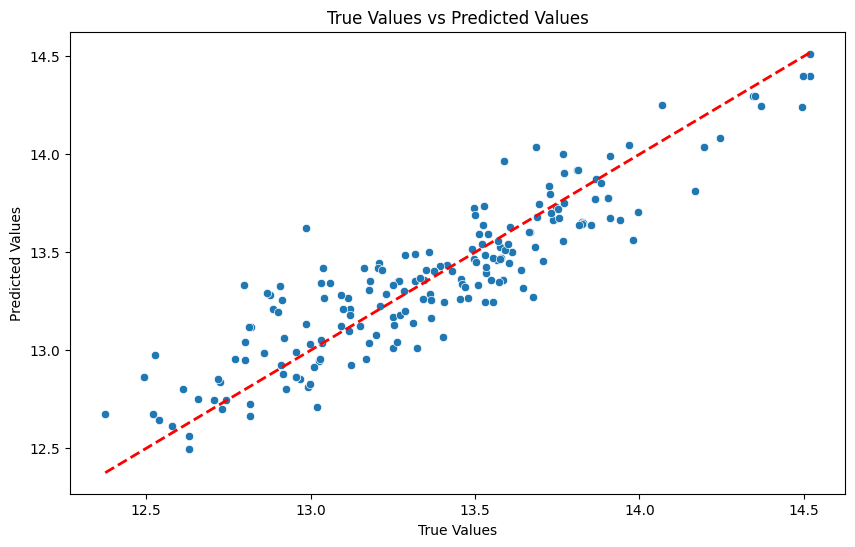

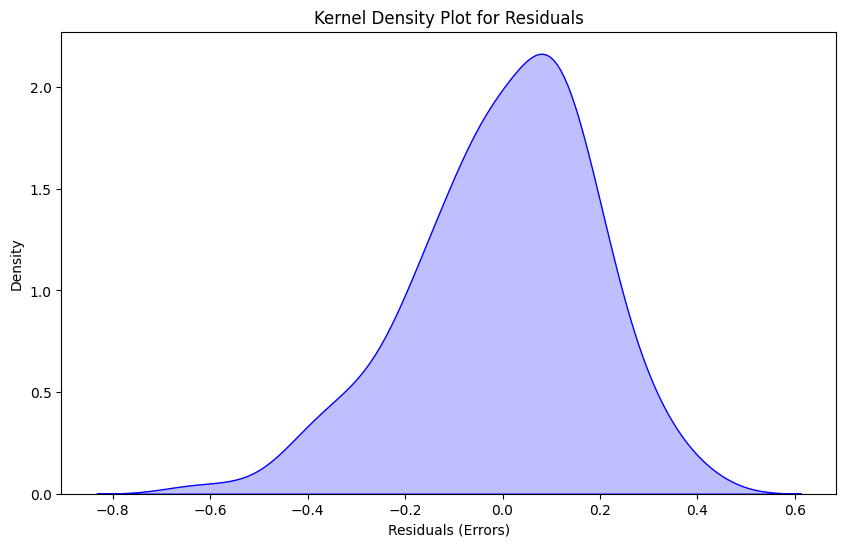


The predicted values and true values roughly line up along the diagonal
The residuals look roughly bell-shaped around zero
Strengths:
	The scatter plot's proximity to the diagonal line suggests that the model's predictions are generally aligned with the true values, which indicates a good predictive power of the model
	The roughly bell-shaped distribution of residuals in the kernel density plot is a positive sign, indicating that the errors are centered around zero, and the model is not consistently overestimating or underestimating the target variable
The only main weakness is that there are potentially a few outliers that may be impacting the performance of the model and skewing the distribution


In [ ]:
# Q1-6
# Fit the best model (Model 3)
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

best_model.fit(X_train, y_train)

# Predict on the test set
predictions = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

# Residuals/Error Plot
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True, color='b')
plt.xlabel('Residuals (Errors)')
plt.title('Kernel Density Plot for Residuals')
plt.show()

print("\nThe predicted values and true values roughly line up along the diagonal")
print("The residuals look roughly bell-shaped around zero")
print("Strengths:\n\tThe scatter plot's proximity to the diagonal line suggests that the model's predictions are generally aligned with the true values, which indicates a good predictive power of the model")
print("\tThe roughly bell-shaped distribution of residuals in the kernel density plot is a positive sign, indicating that the errors are centered around zero, and the model is not consistently overestimating or underestimating the target variable")
print("The only main weakness is that there are potentially a few outliers that may be impacting the performance of the model and skewing the distribution")

In [ ]:
# Q1-7
from sklearn.tree import DecisionTreeRegressor

# Create and fit decision trees with varying depths
depths_to_try = range(1, 21)  # Adjust as needed

r2_scores = []
rmse_scores = []

for depth in depths_to_try:
    # Create and fit the decision tree
    tree_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])

    tree_model.fit(X_train, y_train)

    # Predict on the test set
    tree_predictions = tree_model.predict(X_test)

    # Evaluate R^2 and RMSE
    r2_tree = r2_score(y_test, tree_predictions)
    rmse_tree = np.sqrt(mean_squared_error(y_test, tree_predictions))

    # Append results to lists
    r2_scores.append(r2_tree)
    rmse_scores.append(rmse_tree)

    # Print results for each depth
    print(f"Depth {depth} - R^2: {r2_tree}, RMSE: {rmse_tree}")

# Find the depth that gives the best results
best_depth_index = np.argmax(r2_scores)
best_depth = depths_to_try[best_depth_index]

print("\nBest Results:")
print("Best Depth:", best_depth)
print("Best R^2:", r2_scores[best_depth_index])
print("Best RMSE:", rmse_scores[best_depth_index])

Depth 1 - R^2: 0.3634575215896697, RMSE: 0.34841130468242304
Depth 2 - R^2: 0.5457918224166116, RMSE: 0.2943106764987489
Depth 3 - R^2: 0.5900197469093493, RMSE: 0.27961470806255134
Depth 4 - R^2: 0.6522447549011203, RMSE: 0.257522622875327
Depth 5 - R^2: 0.7182122124002168, RMSE: 0.23181398144893756
Depth 6 - R^2: 0.7478231457106319, RMSE: 0.2192962240971327
Depth 7 - R^2: 0.7817196205580006, RMSE: 0.20402617727118091
Depth 8 - R^2: 0.7477304664525668, RMSE: 0.2193365179305483
Depth 9 - R^2: 0.756837174473246, RMSE: 0.2153412020918388
Depth 10 - R^2: 0.7476696302354073, RMSE: 0.21936296345386194
Depth 11 - R^2: 0.7446131201467042, RMSE: 0.2206875501426159
Depth 12 - R^2: 0.7559390484508148, RMSE: 0.2157385187481033
Depth 13 - R^2: 0.7622078626655897, RMSE: 0.21294982509044363
Depth 14 - R^2: 0.768422941782773, RMSE: 0.21014850695259665
Depth 15 - R^2: 0.7420032838802006, RMSE: 0.22181230328603552
Depth 16 - R^2: 0.7315704644063754, RMSE: 0.22625265930975633
Depth 17 - R^2: 0.760721415

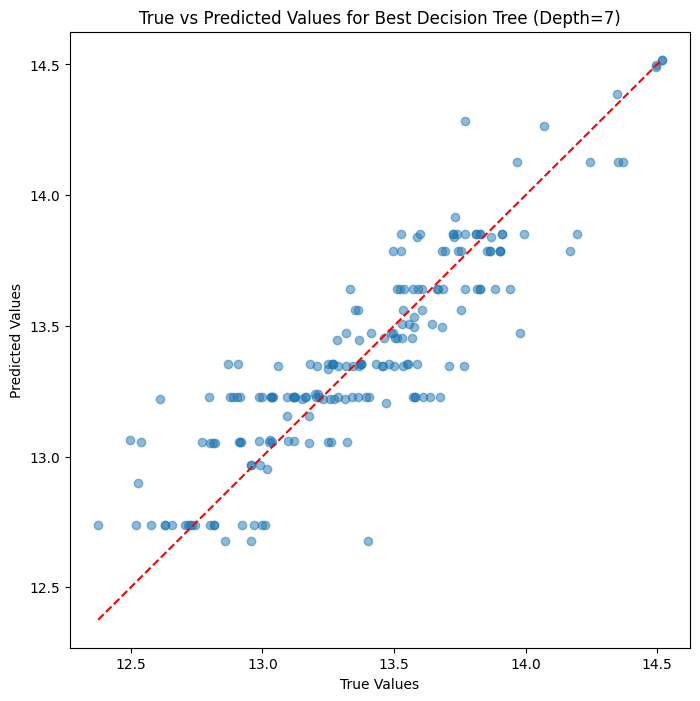

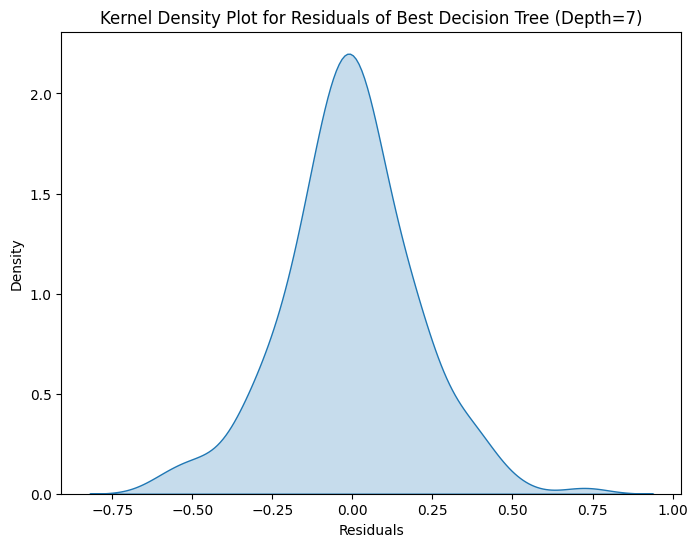


The predicted values and true values line up fairly well along the diagonal (although some are farther to the sides), and the residuals look roughly bell-shaped around zero


The linear models had better performance on the test set (especially linear models with with one-hot encoding of categorical variables)


In [ ]:
# Q1 - 8, 9
import seaborn as sns
import matplotlib.pyplot as plt

# Create and fit the best decision tree
best_tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=7, random_state=42))
])

best_tree_model.fit(X_train, y_train)

# Predict on the test set
best_tree_predictions = best_tree_model.predict(X_test)

# Plot predicted values against true values with a diagonal line
plt.figure(figsize=(8, 8))
plt.scatter(y_test, best_tree_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Best Decision Tree (Depth=7)')
plt.show()

# Compute residuals/errors
residuals = y_test - best_tree_predictions

# Create a kernel density plot for residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.title('Kernel Density Plot for Residuals of Best Decision Tree (Depth=7)')
plt.show()

print("\nThe predicted values and true values line up fairly well along the diagonal (although some are farther to the sides), and the residuals look roughly bell-shaped around zero")

print("\n\nThe linear models had better performance on the test set (especially linear models with with one-hot encoding of categorical variables)")

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

Used ChatGPT to see what it provided for steps 1-3:

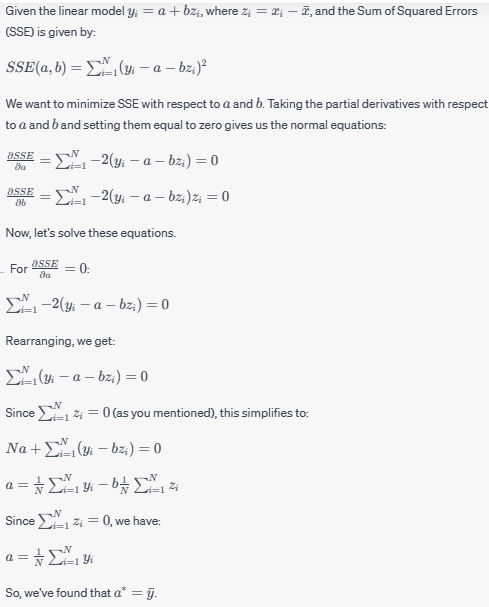

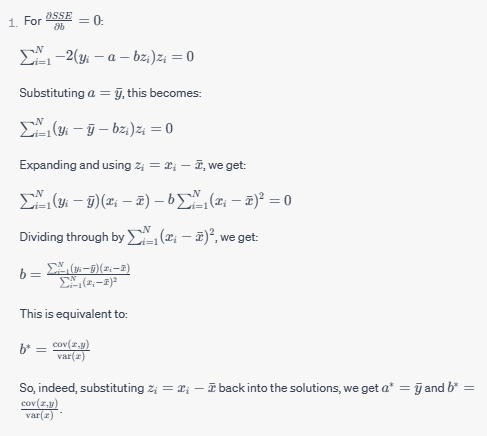

4. $b^*$ will be large when there is a strong positive linear relationship between $x$ and $y$ and small when there is a weak/non-existent linear relationship between $x$ and $y$. The denominator $var(x)$ in the expression indicates that $b^*$ is inversely proportional to the variance of $x$. Hence, if $x$ has low variance, $b^*$ tends to be large. $a$ is the intercept of the regression line - the expected value of $y$ when $x = 0.$
5. If the variance of $x$ is inflated, the coeffiencent $b^*$ will decrease as the denominator will get larger - $b^*$ will get closer to 0. This impact on $b^*$ can lead to underestimation of the linear relationship between $x$ and $y$, and the model can become less reliable.
6. If you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$, both situations may impact $b^*$ (the variance and covariance would change) and $a^*$ (as the average would also change due to strong outliers). If extreme values are exerting significant influence over the regression coefficients, the model may be tailored to fit those extreme observations well and its performance on more average observations may not be as good - the model would not be generalizable for most of the data.